In [1]:
using DifferentialEquations, Plots, LinearAlgebra, LaTeXStrings

# Defaults for plotting 
plot_font = "Computer Modern";
default(fontfamily=plot_font,framestyle=:box, label=nothing, grid=false, tickfontsize=7)
scalefontsizes(1.3)

In [4]:
A = [1 3; -1 2]
B = [0 1; 1 0]

kron(A,B)

4×4 Matrix{Int64}:
  0   1  0  3
  1   0  3  0
  0  -1  0  2
 -1   0  2  0

In [176]:
# Params & Grid 

N = 50 # Dimensionality --> 
xMax = 5 # Spatial extension20
x = 2*(-N÷2:N÷2-1)xMax/N # Spatial vector
y = copy(x)'
Δx = x[2]-x[1] # Spatial precision
;

In [177]:
# Constants

# Normalized
ħ=1 # Planck's contant over 2π
k=1 # Spring stiffness
m=1 # Mass
ω=sqrt(k/m) # Angular frequency
;

In [178]:
# Functions 

# Potential (normalized)
function harmonic(x,y) 
   0.5(x.^2 .+ y.^2)
end

# Normlization
norm(x)  = x./maximum(abs.(x))
;

In [179]:
II = Matrix(1I, N, N) 
V = reshape(harmonic(x,y), (1,N^2))
Tx = Tridiagonal(-1.0*ones(N-1), 2.0 * ones(N), -1.0 * ones(N-1))./(2Δx^2)

T = (kron(II, Tx) .+ kron(Tx, II))

# N*N Hamiltonian matrix based on Finite Difference Method
H = (T .+ Diagonal(V[:]))

# Results

ψs = eigvecs(H) # Eigenfunctions --> probability amplitude
es = eigvals(H) # Eigenvalues --> Energy (normalized)
;

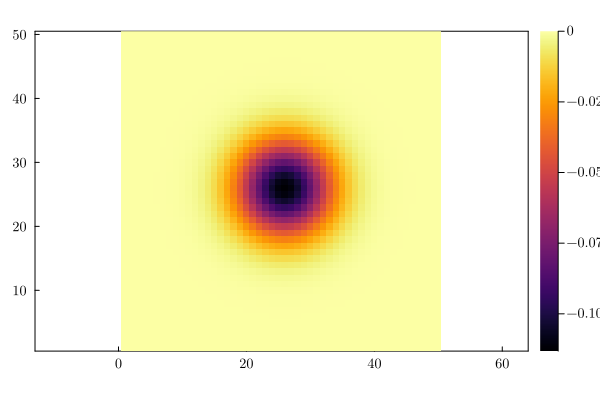

In [182]:
ψ = reshape(ψs, (N,N,N^2))
heatmap(real.(ψ[:,:,1]), aspect_ratio=:equal)

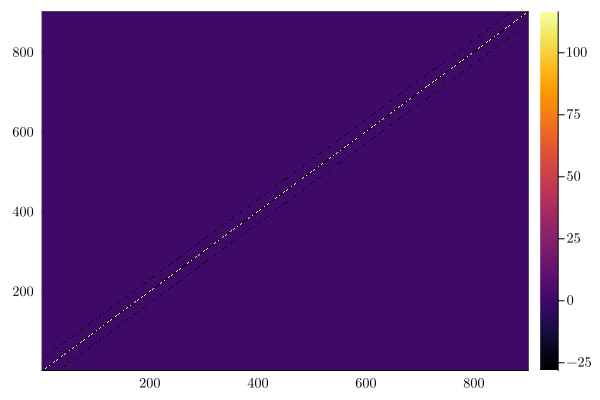

In [174]:
heatmap(H)

In [99]:
p1=plot(x,harmonic(x),lw=2,color=:red,label="",ls=:dash, ylabel="Potential [u.a]", xlabel="Position [u.a]")
p2=twinx(p1)
plot!(p2,ylabel=L"\psi(x) + E_n")

for n in 1:5
y=es[n] .+ ((ψs[:,n]) |> norm)/2
plot!(p2,x, es[n] .+ 0.0*x, fillrange = y, fillalpha = 0.35, label="")
plot!(p2,x,y, label="", color=:black, bottommargin=3Plots.mm )
end
display(current())

MethodError: MethodError: no method matching harmonic(::StepRangeLen{Float64, Float64, Float64, Int64})

Closest candidates are:
  harmonic(::Any, !Matched::Any)
   @ Main e:\DEV\GitHub\julia_numerical_methods\Finite_difference_method\TISE_2D_quantum_oscillator.ipynb:4


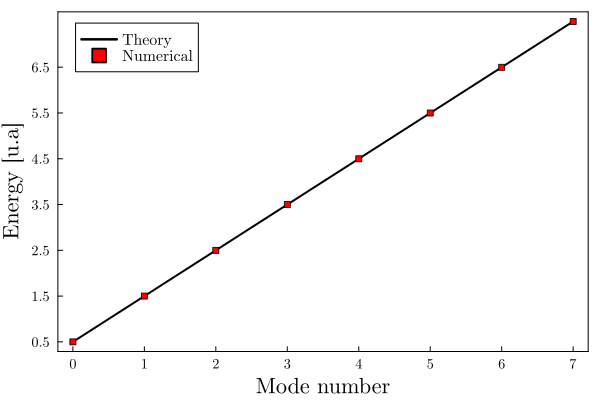

In [150]:
n = 0:7
En = ħ*ω.*(n.+0.5) # Theoretical 
Enum = ħ*ω*es[n.+1] # Numerical
plot(gridalpha=0.8,xticks=n, yticks=(0.5:maximum(Enum)), xlabel="Mode number", ylabel="Energy [u.a]")
plot!(n,En, label="Theory",lw=2, color=:black)
scatter!(n,Enum, label="Numerical", m=:square, mcolor=:red, ms=3)

In [159]:
V[:]

900-element Vector{Float64}:
 100.0
  93.55555555555557
  87.55555555555554
  82.0
  76.88888888888889
  72.22222222222223
  68.0
  64.22222222222223
  60.88888888888889
  58.0
   ⋮
  51.55555555555554
  54.44444444444443
  57.77777777777776
  61.55555555555554
  65.77777777777774
  70.44444444444443
  75.55555555555554
  81.11111111111109
  87.11111111111109

In [153]:
Diagonal(V)

1×1 Diagonal{Float64, Vector{Float64}}:
 100.0